# Import Basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import data

In [2]:
file_path = r'S:\Projects\Capstone Projects\FlightPricePrediction\Flight_Fare.xlsx'

data = pd.read_excel(file_path)

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Data Understanding

In [4]:
# Check the dimensions of the dataset
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 10683
Number of columns: 11


In [5]:
# Display the first few rows of the dataset
# data.head() : use this directly to display the first few rows as form of data
print(data.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


# Summary Statistics

In [6]:
# Display concise summary of the dataset
#checking the data type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


In [7]:
# Summary statistics for numerical features
print(data.describe())
print(data.describe(include='O'))

              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000
            Airline Date_of_Journey Source Destination            Route  \
count         10683           10683  10683       10683            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq           3849             504   4537        4537             2376   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  
count     10683        10683    10683       10682           10683  
unique      222         1343      368           5              10  
top       18:55        19:00   2h 50m      1 stop         No info  
freq        233          423      550        5625            8345  


# Handling Missing Values

In [8]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [9]:
data.dropna(inplace=True)  # Drop rows with missing values

In [10]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


# Converting Date and Time Features

### Working on 'Date_of_Journey' column

In [11]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month
data.drop('Date_of_Journey', axis=1, inplace=True)

### Working on 'Dep_Time' column

In [12]:
data['Dep_Hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_Minute'] = pd.to_datetime(data['Dep_Time']).dt.minute
data.drop('Dep_Time', axis=1, inplace=True)

### Working on 'Arrival_Time' column

In [13]:
data['Arrival_Hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_Minute'] = pd.to_datetime(data['Arrival_Time']).dt.minute
data.drop('Arrival_Time', axis=1, inplace=True)

In [14]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


# Label Encoding

### Working on : 'Airline', 'Source', 'Destination', 'Additional_Info' columns

In [15]:
# Using label encoder to convert the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.Airline=lc.fit_transform(data.Airline)
data.Source=lc.fit_transform(data.Source)
data.Destination=lc.fit_transform(data.Destination)
data.Additional_Info=lc.fit_transform(data.Additional_Info)

In [16]:
# dataset after Label Encoding:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,3,0,5,BLR → DEL,2h 50m,non-stop,8,3897,24,3,22,20,1,10
1,1,3,0,CCU → IXR → BBI → BLR,7h 25m,2 stops,8,7662,1,5,5,50,13,15
2,4,2,1,DEL → LKO → BOM → COK,19h,2 stops,8,13882,9,6,9,25,4,25
3,3,3,0,CCU → NAG → BLR,5h 25m,1 stop,8,6218,12,5,18,5,23,30
4,3,0,5,BLR → NAG → DEL,4h 45m,1 stop,8,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,CCU → BLR,2h 30m,non-stop,8,4107,9,4,19,55,22,25
10679,1,3,0,CCU → BLR,2h 35m,non-stop,8,4145,27,4,20,45,23,20
10680,4,0,2,BLR → DEL,3h,non-stop,8,7229,27,4,8,20,11,20
10681,10,0,5,BLR → DEL,2h 40m,non-stop,8,12648,1,3,11,30,14,10


### Working on 'Total_Stops' column

In [17]:
# Extract number of stops from Total_Stops
data['Total_Stops'] = data['Total_Stops'].replace({'non-stop': '0 stops'})
data['Total_Stops'] = data['Total_Stops'].str.split().str[0].astype(int)

### Working on 'Duration' column

In [18]:
# Feature Engineering
data['Duration_hours'] = data['Duration'].str.split().str[0]
data['Duration_minutes'] = data['Duration'].str.split().str[1]
data['Duration_hours'] = data['Duration_hours'].str.extract('(\d+)').astype(float)        
data['Duration_minutes'] = data['Duration_minutes'].str.extract('(\d+)').astype(float)
data['Duration_minutes'].fillna(0, inplace=True)
data.drop('Duration', axis=1, inplace=True)

- We're splitting the values in the 'Duration' column based on whitespace (using str.split()) and extracting the first part into 'Duration_hours' and the second part into 'Duration_minutes'.
- We're using regular expressions (str.extract('(\d+)')) to extract only the numerical part (digits) from the 'Duration_hours' and 'Duration_minutes' columns.
- Last, we're using Fillna to fill in missing values in 'Duration_minutes'.

In [19]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes
0,3,0,5,BLR → DEL,0,8,3897,24,3,22,20,1,10,2.0,50.0
1,1,3,0,CCU → IXR → BBI → BLR,2,8,7662,1,5,5,50,13,15,7.0,25.0
2,4,2,1,DEL → LKO → BOM → COK,2,8,13882,9,6,9,25,4,25,19.0,0.0
3,3,3,0,CCU → NAG → BLR,1,8,6218,12,5,18,5,23,30,5.0,25.0
4,3,0,5,BLR → NAG → DEL,1,8,13302,1,3,16,50,21,35,4.0,45.0


In [20]:
data.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

### Working on 'Route' column

In [21]:
# Extracting number of stops
data['Stops'] = data['Route'].str.split('→').apply(lambda x: len(x) - 1)

# Dropping the original 'Route' column
data.drop('Route', axis=1, inplace=True)


## It calculates the number of stops for each flight route in your dataset. It does this by splitting the 'Route' column based on the '→' symbol, counting the number of segments (which corresponds to stops), and then creating a new column named 'Stops' to store this information. Finally, it drops the original 'Route' column from the DataFrame to keep the data concise.

In [22]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes,Stops
0,3,0,5,0,8,3897,24,3,22,20,1,10,2.0,50.0,1
1,1,3,0,2,8,7662,1,5,5,50,13,15,7.0,25.0,3
2,4,2,1,2,8,13882,9,6,9,25,4,25,19.0,0.0,3
3,3,3,0,1,8,6218,12,5,18,5,23,30,5.0,25.0,2
4,3,0,5,1,8,13302,1,3,16,50,21,35,4.0,45.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,8,4107,9,4,19,55,22,25,2.0,30.0,1
10679,1,3,0,0,8,4145,27,4,20,45,23,20,2.0,35.0,1
10680,4,0,2,0,8,7229,27,4,8,20,11,20,3.0,0.0,1
10681,10,0,5,0,8,12648,1,3,11,30,14,10,2.0,40.0,1


# Countplot for categorical columns

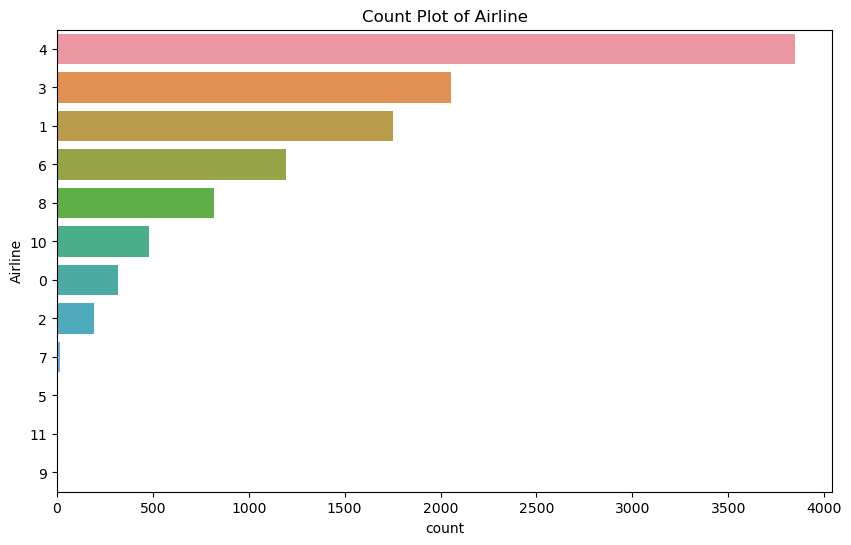

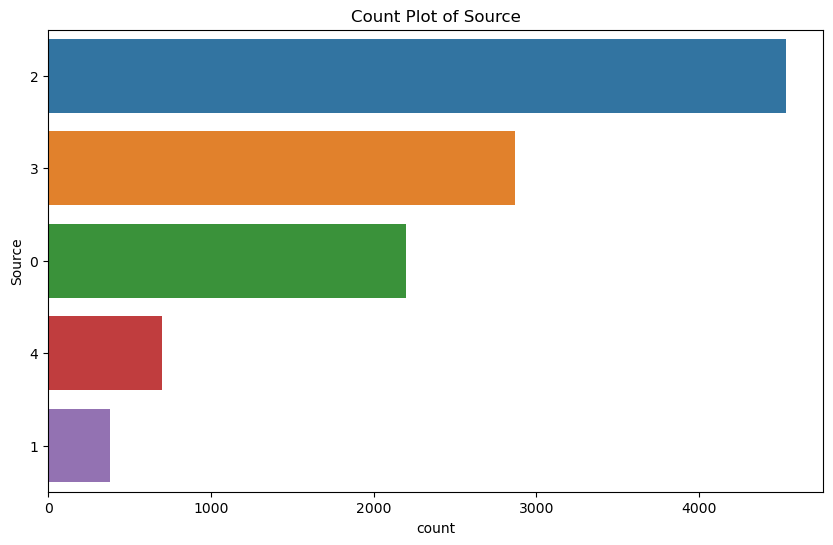

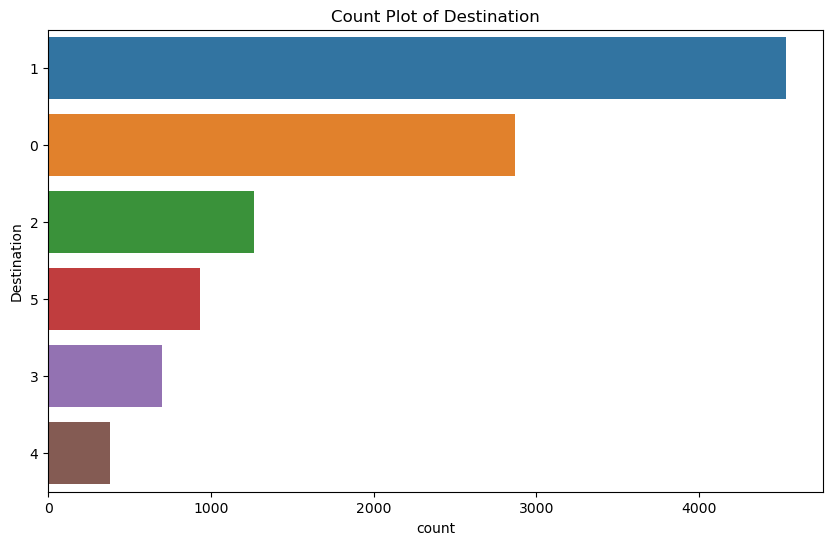

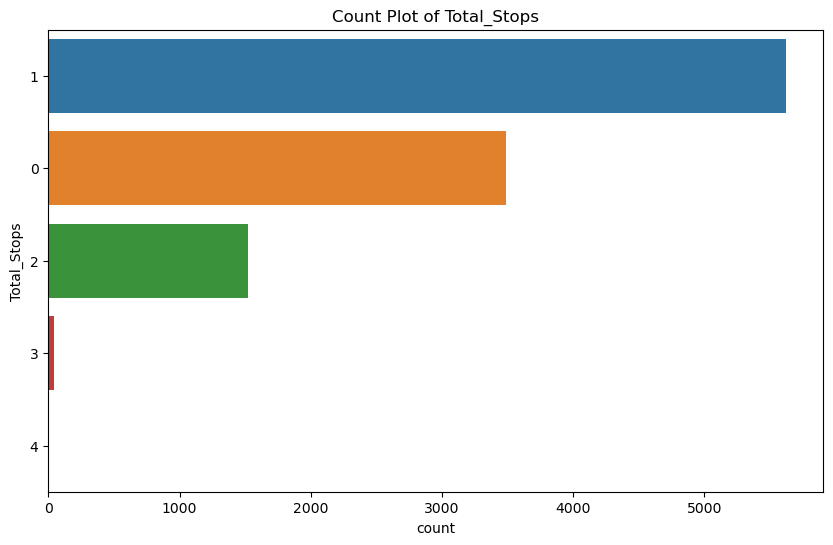

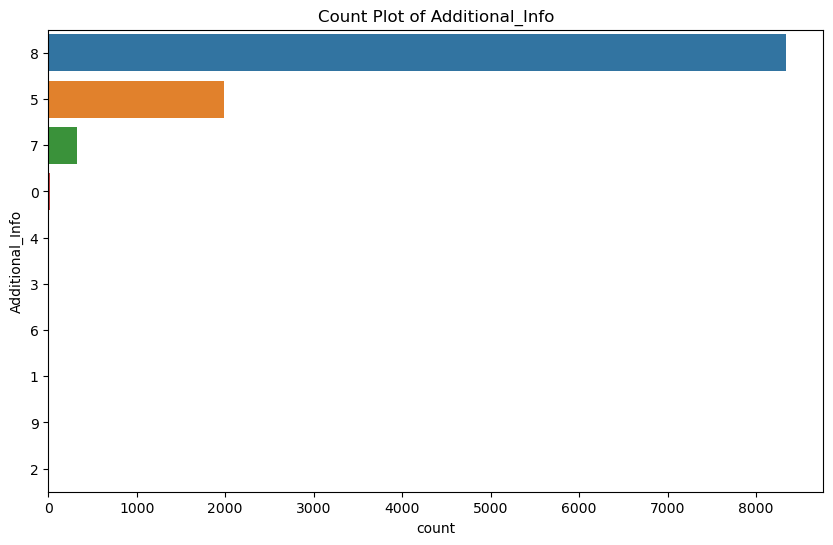

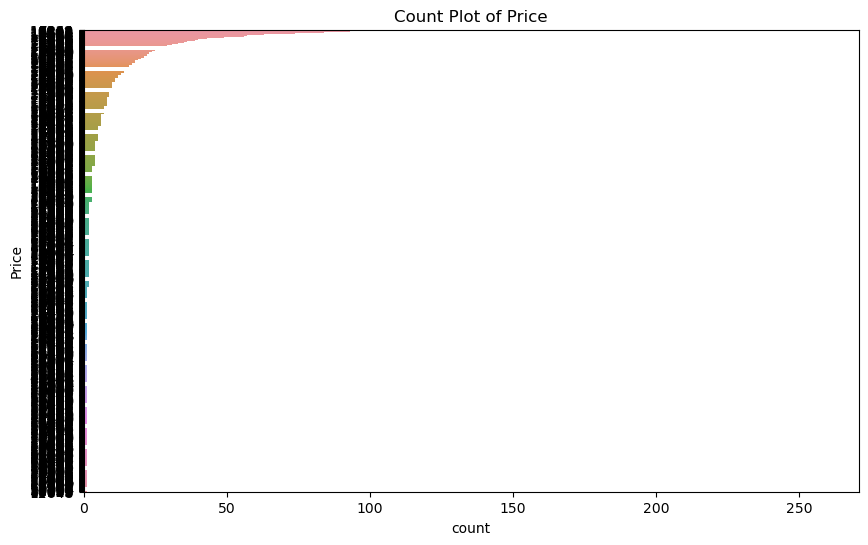

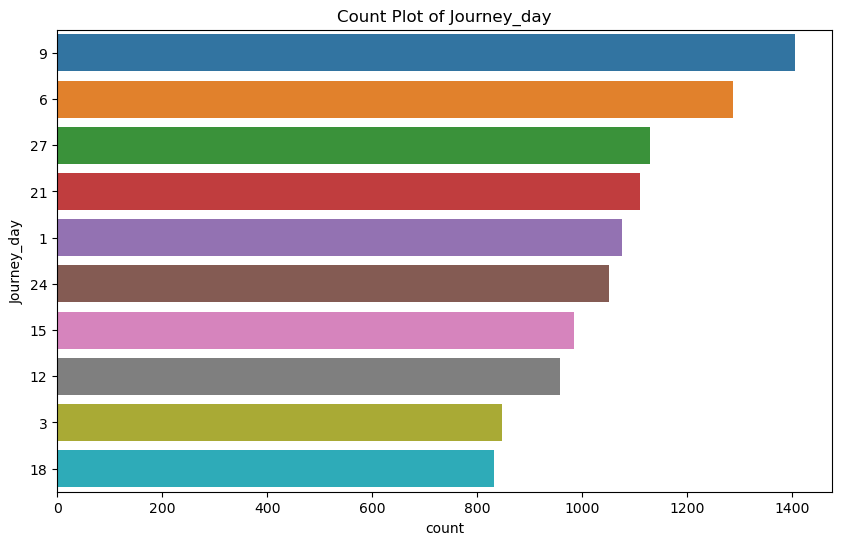

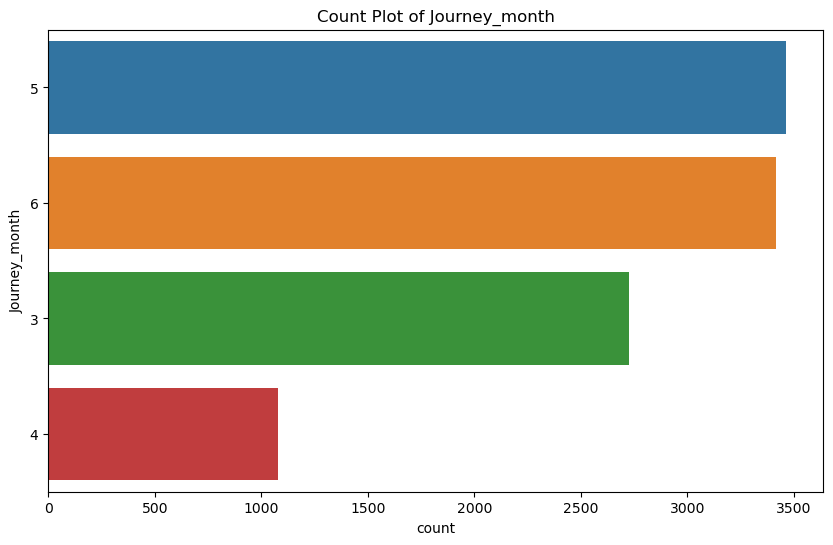

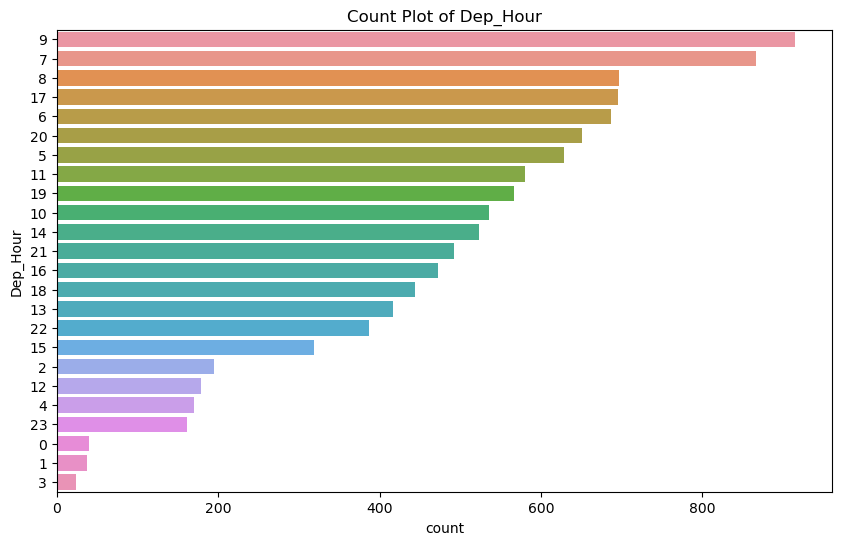

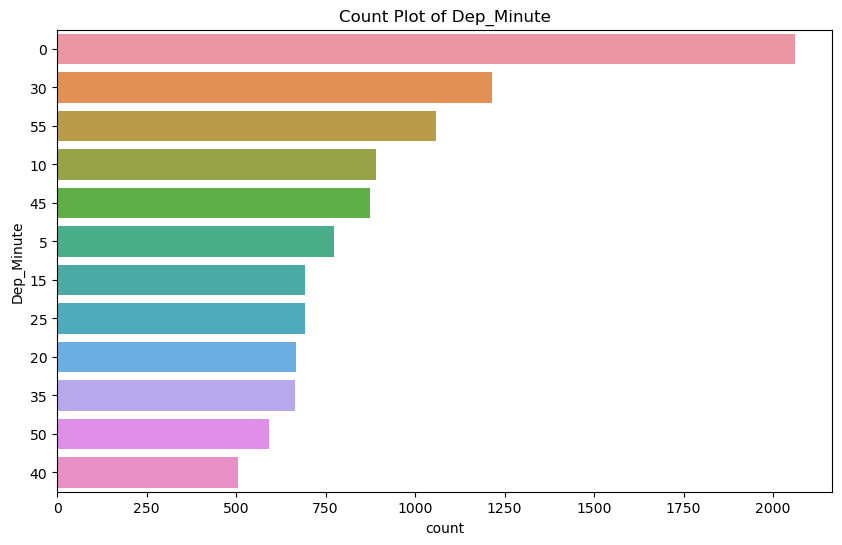

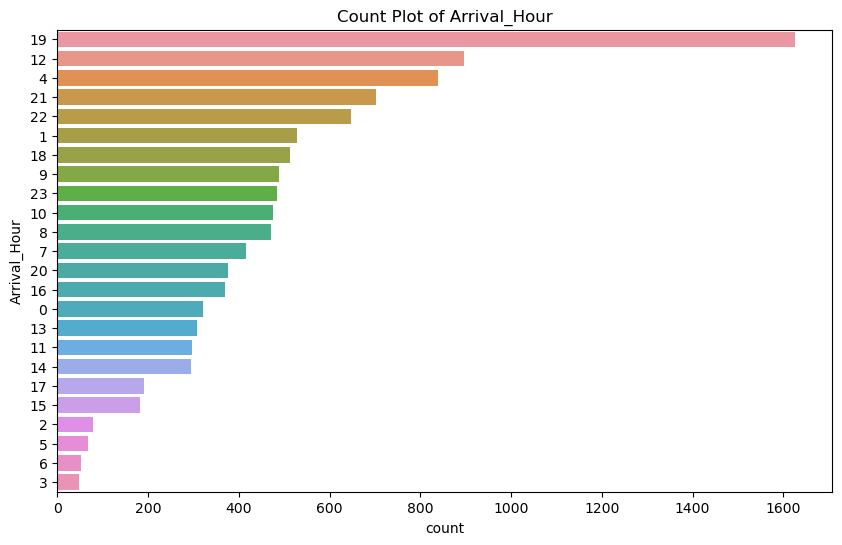

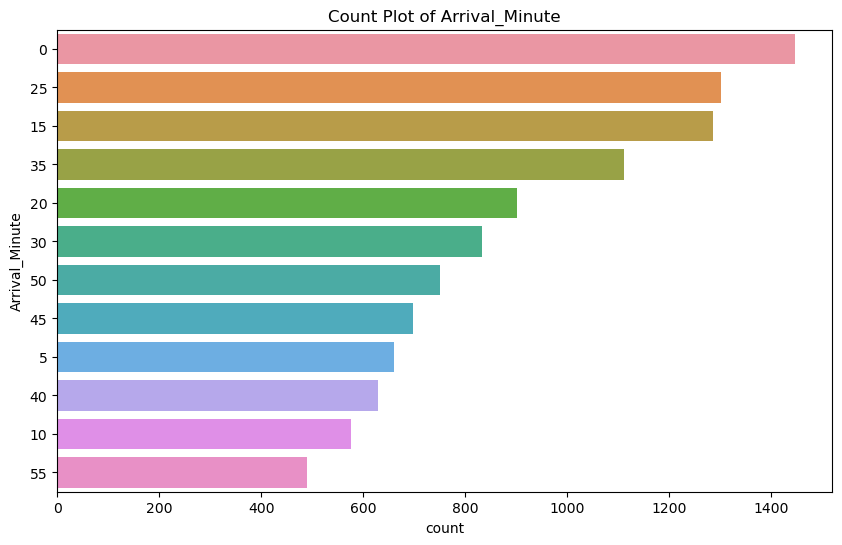

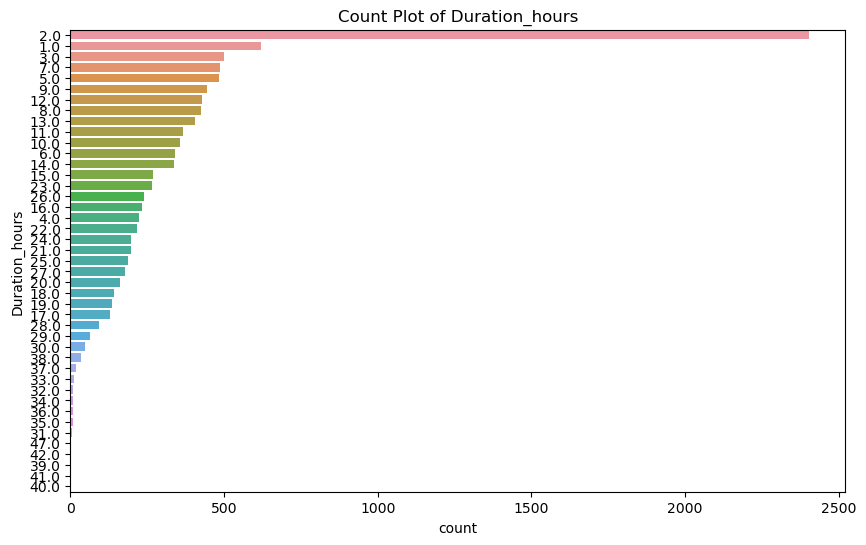

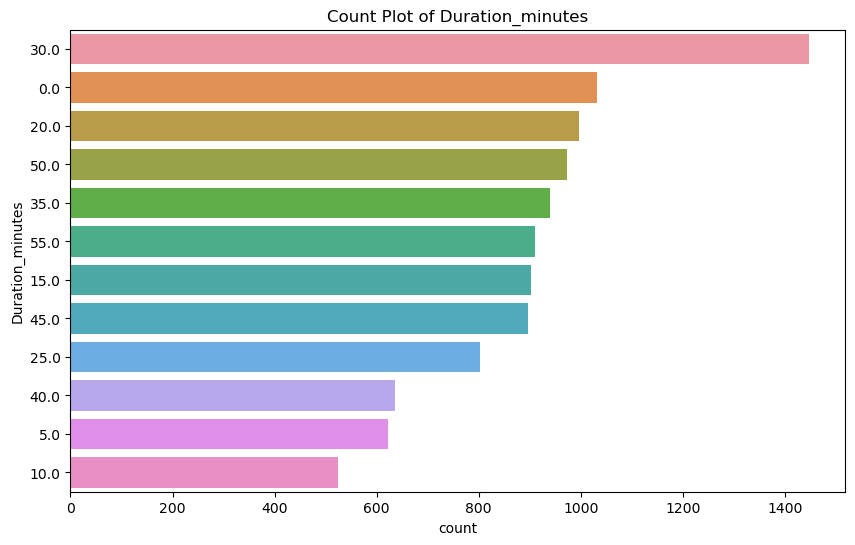

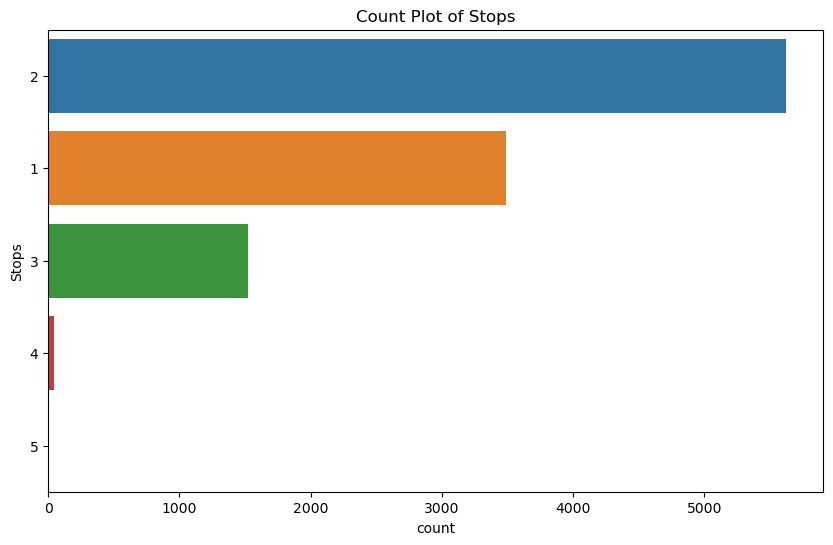

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
categorical_cols = [col for col in data.columns if data[col].dtype in ['int32', 'int64', 'float64']]

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, y=col, order=data[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.show()


# Box plot for numerical columns

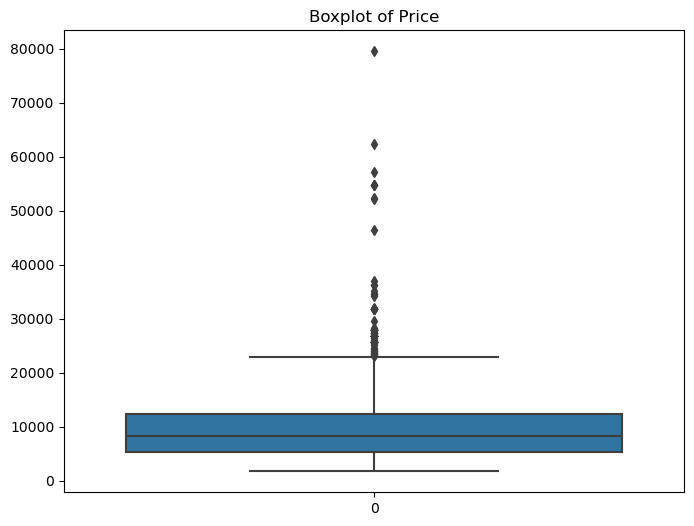

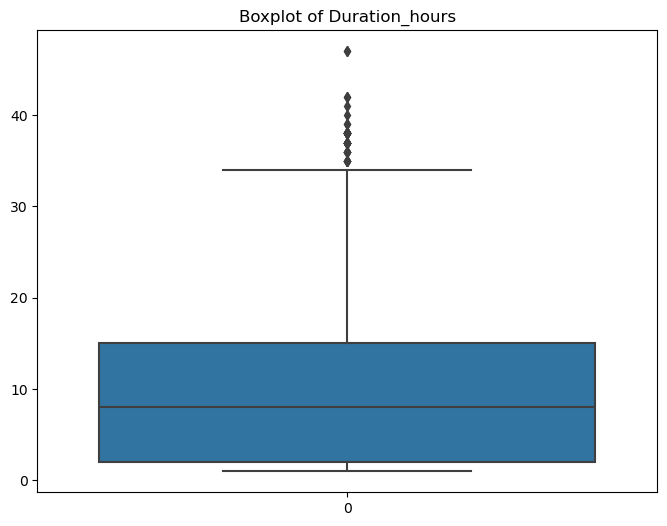

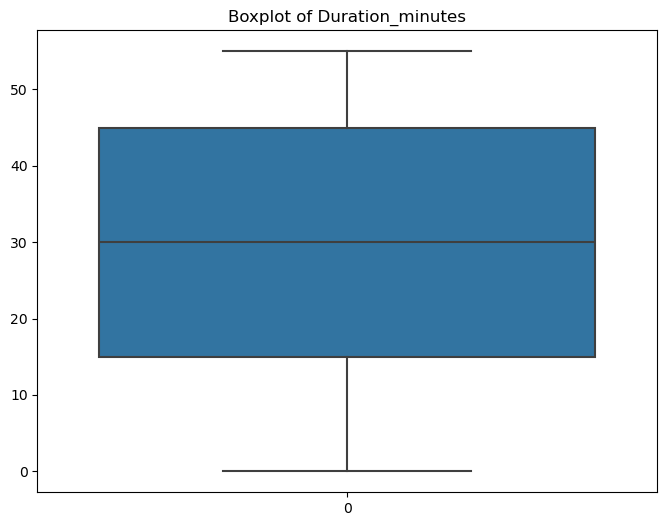

In [24]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for outlier detection
numerical_cols = ['Price', 'Duration_hours', 'Duration_minutes']

# Create box plots for each numerical column to visualize outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Detect outliers using z-score
z_scores = stats.zscore(data[numerical_cols])
outliers = ((z_scores > 3) | (z_scores < -3)).any(axis=1)



# Using box plots, we're getting outliers. Now let's check both numerical and categorical columns.

# Outlier Detection:

In [25]:
import pandas as pd
from scipy import stats

# Assuming your DataFrame is named 'data' and 'Price' column is to be excluded
numerical_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col != 'Price']
categorical_cols = [col for col in data.columns if col not in numerical_cols and col != 'Price']

# Detect outliers in numerical data using z-score
outliers_numerical = {}
for col in numerical_cols:
    z_scores = stats.zscore(data[col])
    outliers_numerical[col] = data[(z_scores > 3) | (z_scores < -3)][col].values

# Detect outliers in categorical data by identifying rare categories
outliers_categorical = {}
for col in categorical_cols:
    counts = data[col].value_counts()
    rare_categories = counts[counts < 10].index  # Adjust threshold as needed
    outliers_categorical[col] = data[data[col].isin(rare_categories)][col].values

# Display outliers in numerical data
print("Outliers in numerical data:")
for col, outlier_values in outliers_numerical.items():
    print(f"Column '{col}': {outlier_values}")

# Display outliers in categorical data
print("\nOutliers in categorical data:")
for col, outlier_values in outliers_categorical.items():
    print(f"Column '{col}': {outlier_values}")


Outliers in numerical data:
Column 'Duration_hours': [37. 38. 37. 36. 47. 38. 37. 37. 37. 37. 38. 36. 38. 38. 37. 37. 38. 38.
 36. 38. 38. 38. 38. 38. 38. 38. 36. 38. 37. 36. 38. 42. 38. 37. 39. 38.
 38. 37. 37. 38. 38. 37. 36. 38. 38. 41. 38. 38. 38. 42. 38. 38. 37. 36.
 38. 37. 37. 38. 38. 38. 37. 39. 38. 40. 47. 38.]
Column 'Duration_minutes': []
Column 'Stops': [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 4 4 4 4]

Outliers in categorical data:
Column 'Airline': [11  5  9  5  5  5 11 11  5  5]
Column 'Source': []
Column 'Destination': []
Column 'Total_Stops': [4]
Column 'Additional_Info': [1 6 4 6 4 3 3 4 3 9 4 4 6 4 4 3 2]
Column 'Journey_day': []
Column 'Journey_month': []
Column 'Dep_Hour': []
Column 'Dep_Minute': []
Column 'Arrival_Hour': []
Column 'Arrival_Minute': []


# "Exploring Outliers: Key Insights from flight_fare data"
## By using z-score for numerical columns and value_count for categorical columns, we have outliers in: 

- 'Duration_hours'

- 'Stops'

- 'Airline'

- 'Total_Stops'

- 'Additional_Info'


In [26]:
import pandas as pd
from scipy import stats

# Assuming your DataFrame is named 'data' and 'Price' column is to be excluded
numerical_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col != 'Price']
categorical_cols = [col for col in data.columns if col not in numerical_cols and col != 'Price']

# Detect outliers in numerical data using z-score
outliers_numerical = []
for col in numerical_cols:
    z_scores = stats.zscore(data[col])
    outlier_indexes = data[(z_scores > 3) | (z_scores < -3)].index
    outliers_numerical.extend(outlier_indexes)

# Detect outliers in categorical data by identifying rare categories
outliers_categorical = []
for col in categorical_cols:
    counts = data[col].value_counts()
    rare_categories = counts[counts < 10].index  # Adjust threshold as needed
    outlier_indexes = data[data[col].isin(rare_categories)].index
    outliers_categorical.extend(outlier_indexes)

# Combine all outlier indexes
outliers_indexes = set(outliers_numerical + outliers_categorical)

# Remove outliers from the dataset
cleaned_data = data.drop(outliers_indexes)

# Display the shape of the cleaned dataset
print("Shape of cleaned data:", cleaned_data.shape)


Shape of cleaned data: (10560, 15)


# We're using the same 'z-score for numerical columns and value_count for categorical columns' to remove outliers.

In [27]:
import pandas as pd
from scipy import stats

# Assuming your DataFrame is named 'cleaned_data' and 'Price' column is to be excluded
numerical_cols = [col for col in cleaned_data.columns if cleaned_data[col].dtype in ['int64', 'float64'] and col != 'Price']
categorical_cols = [col for col in cleaned_data.columns if col not in numerical_cols and col != 'Price']

# Detect outliers in numerical cleaned_data using z-score
outliers_numerical = {}
for col in numerical_cols:
    z_scores = stats.zscore(cleaned_data[col])
    outliers_numerical[col] = cleaned_data[(z_scores > 3) | (z_scores < -3)][col].values

# Detect outliers in categorical cleaned_data by identifying rare categories
outliers_categorical = {}
for col in categorical_cols:
    counts = cleaned_data[col].value_counts()
    rare_categories = counts[counts < 10].index  # Adjust threshold as needed
    outliers_categorical[col] = cleaned_data[cleaned_data[col].isin(rare_categories)][col].values

# Display outliers in numerical cleaned_data
print("Outliers in numerical cleaned_data:")
for col, outlier_values in outliers_numerical.items():
    print(f"Column '{col}': {outlier_values}")

# Display outliers in categorical cleaned_data
print("\nOutliers in categorical cleaned_data:")
for col, outlier_values in outliers_categorical.items():
    print(f"Column '{col}': {outlier_values}")


Outliers in numerical cleaned_data:
Column 'Duration_hours': [35. 35. 35. 35.]
Column 'Duration_minutes': []
Column 'Stops': []

Outliers in categorical cleaned_data:
Column 'Airline': []
Column 'Source': []
Column 'Destination': []
Column 'Total_Stops': []
Column 'Additional_Info': []
Column 'Journey_day': []
Column 'Journey_month': []
Column 'Dep_Hour': []
Column 'Dep_Minute': []
Column 'Arrival_Hour': []
Column 'Arrival_Minute': []


# We can see now that there are no outliers.

# Missing Values:

In [28]:
# Check for missing values
missing_values = cleaned_data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
Journey_day         0
Journey_month       0
Dep_Hour            0
Dep_Minute          0
Arrival_Hour        0
Arrival_Minute      0
Duration_hours      0
Duration_minutes    0
Stops               0
dtype: int64


### - "Fortunately, the dataset does not contain any missing values, ensuring a complete and reliable dataset for analysis."

# defing Independent variables as x and Dependent variable(Target variable ) as y

In [29]:
X = cleaned_data.drop('Price', axis=1) 
X

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes,Stops
0,3,0,5,0,8,24,3,22,20,1,10,2.0,50.0,1
1,1,3,0,2,8,1,5,5,50,13,15,7.0,25.0,3
2,4,2,1,2,8,9,6,9,25,4,25,19.0,0.0,3
3,3,3,0,1,8,12,5,18,5,23,30,5.0,25.0,2
4,3,0,5,1,8,1,3,16,50,21,35,4.0,45.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,8,9,4,19,55,22,25,2.0,30.0,1
10679,1,3,0,0,8,27,4,20,45,23,20,2.0,35.0,1
10680,4,0,2,0,8,27,4,8,20,11,20,3.0,0.0,1
10681,10,0,5,0,8,1,3,11,30,14,10,2.0,40.0,1


In [30]:
y= cleaned_data['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10560, dtype: int64

# Splitting the dataset into the Training set and Test set

In [31]:
## Creating training and testing data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [32]:
x_train

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes,Stops
2478,1,2,1,2,8,21,5,12,0,7,40,19.0,40.0,3
10325,8,0,5,0,8,21,3,9,35,12,30,2.0,55.0,1
1070,4,3,0,1,5,6,5,20,25,9,45,13.0,20.0,2
733,10,1,4,0,8,12,5,17,45,20,5,2.0,20.0,1
2030,1,3,0,0,8,12,6,14,15,16,45,2.0,30.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,6,2,1,1,8,15,6,10,20,1,30,15.0,10.0,2
6083,1,4,3,2,8,12,3,6,0,11,55,29.0,55.0,3
714,3,3,0,0,8,18,3,5,30,8,20,2.0,50.0,1
8461,4,0,5,1,8,6,3,5,45,21,20,15.0,35.0,2


In [33]:
y_train

2478      9653
10325     4945
1070      8066
733      11982
2030      5510
         ...  
459       6795
6083     12854
714       4462
8461     16736
1158      5176
Name: Price, Length: 8448, dtype: int64

# Scaling: Standardization

In [40]:
#Standardization:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Linear Regression Model Creation 

In [41]:
# Creating model
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X_train_scaled,y_train) # training of linear regression

LinearRegression()

In [42]:
y_predict=LR.predict(X_test_scaled)
y_predict

array([ 3442.25191916,  9529.25191916, 11263.25191916, ...,
        9927.25191916,  4834.25191916, 12024.25191916])

In [43]:
y_test

3652     3210
6678     7670
624      7451
9241     6152
4306     4160
        ...  
3031    14571
2738    13587
808      9275
1504     4077
5938    13817
Name: Price, Length: 2112, dtype: int64

In [44]:
# Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)
r2score

0.4602353761974427

In [45]:
# MSE= Mean Square Error
print(mean_squared_error(y_test,y_predict)) 
print(mean_absolute_error(y_test,y_predict))

10735794.447512476
2408.533405643267


# "After training a Linear Regression model, we achieved an R-squared score of 0.46."